In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
class PCA:
    def __init__(self,n_components=1000):
        self.n_components = n_components
    def fit(self,data):
        sd = data.sum(axis=0)
        er = []
        for i in sd:
            if i!=0:
                er.append(list(sd).index(i))
        data = data[:,er]
        for i in range(data.shape[1]):
            data[:,i] = (data[:,i]-data[:,i].mean())/data[:,i].std()
        z = data.T@data
        self.eig_val,self.eig_vec = lg.eig(z)
        val_ind = {i:j for j,i in enumerate(self.eig_val)}
        fer = np.ones((len(val_ind),len(val_ind)))
        for i,j in enumerate(sorted(val_ind)[::-1]):
            fer[:,i] = self.eig_vec[:,val_ind[j]]
        self.d_day = data@fer
        return self.d_day[:,:self.n_components]
    def scree_plot(self,figsize=(16,9)):
        sns.set()
        plt.figure(figsize=figsize)
        eig = sorted(self.eig_val)[::-1]
        self.var,self.cum_var=[],[]
        for i in range(len(eig)):
            self.var.append(eig[i]/sum(eig))
            self.cum_var.append(sum(eig[:i+1])/sum(eig))
        lin1 = sns.lineplot(np.arange(1,len(eig)+1),self.var,color="#fcba03",marker="D",linewidth=3,markersize=10)
        lin2 = sns.lineplot(np.arange(1,len(eig)+1),self.cum_var,color="r",marker="D",linewidth=3,markersize=10)
        plt.xticks([i for i in range(1,len(eig)+1)])
        lin1.legend(["Variance"],loc="upper left")
        lin2.legend(["Cummulative"],loc="upper right")
        plt.xlabel("PCA",fontsize=15)
        plt.ylabel("Variance Explained",fontsize=15)
        plt.show()

In [3]:
class KMeansClassifier:
    def coddist(self,a,b): 
        return np.sqrt(np.sum((a-b)**2)).round(5)
     
    def fit(self,data,k=5,iterer=100,centroid_tray=None):
        if iterer==0:
            self.centroid_tray = np.array(centroid_tray)
            return self.centroid_tray
        if centroid_tray==None:
            l = random.choices(np.arange(0,len(data)),k=k)
            centroid_tray=data[l]
        clust=[]
        for i in data:
            u=[]
            for j in centroid_tray:
                u.append(self.coddist(i,j))
            clust.append(u.index(min(u)))
        self.clust=np.array(clust)
        return self.fit(data,k,iterer-1,centroid_tray=[data[self.clust==i].mean(axis=0).round(3) for i in set(self.clust)])
    
    def wcss_curve(self,data,n_k=5,iterer=100,figsize=(16,9)):
        sns.set()
        tera = KMeansClassifier()
        elbow=[]
        for i in range(1,n_k+1):
            cens = tera.fit(data,i,iterer=iterer)
            wcss=[]
            for j in set(tera.clust):
                ret = np.array([self.coddist(k,j)**2 for k in data[tera.clust==j]])
                wcss.append(sum(ret))
            elbow.append(np.array(wcss).mean())
        plt.figure(figsize=figsize)
        sns.lineplot(np.arange(1,n_k+1),np.array(elbow),marker="D",color="r",linewidth=3,markersize=10,
             markerfacecolor="#581845",markeredgecolor="#581845")
        plt.show()
    def decision_border(self,x,y,palette=None,pointer=100,figsize=(10,10)):
        sns.set()
        def lighten_color(color, amount=0.5):
            import matplotlib.colors as mc
            import colorsys
            try:
                c = mc.cnames[color]
            except:
                c = color
            c = np.array(colorsys.rgb_to_hls(*mc.to_rgb(c)))
            return colorsys.hls_to_rgb(c[0],1-amount * (1-c[1]),c[2])
        light_palette = None if palette==None else [lighten_color(i) for i in palette][:len(self.centroid_tray)]
        rx = np.linspace(min(x),max(x),pointer)
        ry = np.linspace(min(y),max(y),pointer)
        self.points = np.array([[i,j] for j in ry for i in rx])
        yuy=[]
        for i in self.points:
            juj=[]
            for j in self.centroid_tray[:,:2]:
                juj.append(self.coddist(i,j))
            yuy.append(juj.index(min(juj)))
        self.yuy=np.array(yuy)
        plt.figure(figsize=figsize)
        sns.scatterplot(self.points[:,0],self.points[:,1],hue=self.yuy,palette = light_palette,
                        marker="s",s=150,edgecolor=None,legend=False)
        sns.scatterplot(x,y,hue=self.clust,s=100,legend=False,palette=palette[:len(self.centroid_tray)])
        plt.show()

## Iris Dataset

In [4]:
data = pd.read_csv("Iris-Dataset.csv")

In [5]:
data = data[data.columns[:-1]]
data = np.array(data)
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
pca = PCA(2)
pca_iris = pca.fit(data)

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


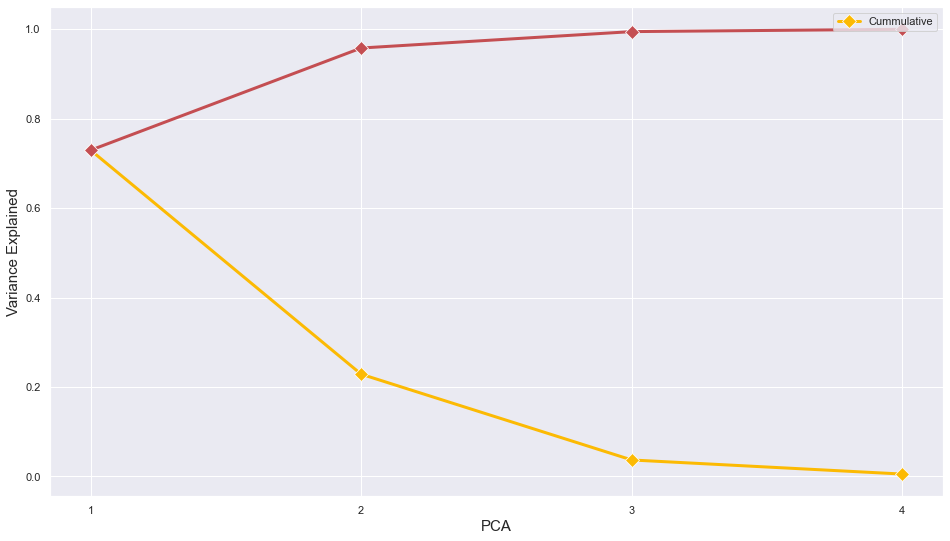

In [7]:
pca.scree_plot()

### Modelling

In [8]:
iris_clf = KMeansClassifier()

In [9]:
iris_clf.fit(pca_iris,k=3,iterer=1000)

array([[ 1.173,  0.066],
       [-2.216, -0.797],
       [-1.881,  0.948]])

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


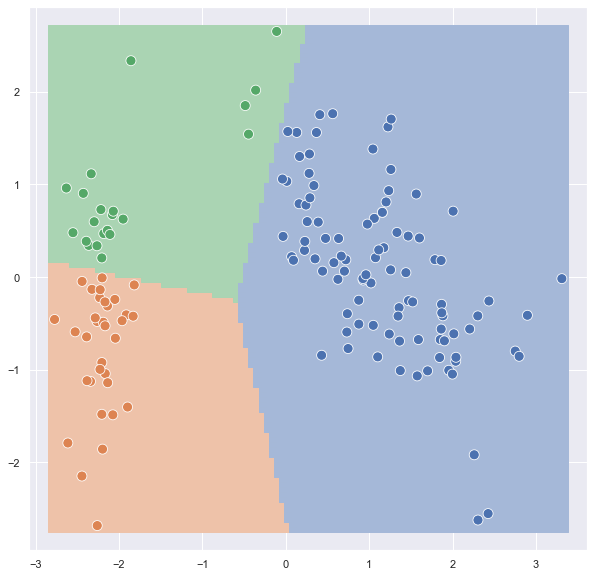

In [10]:
iris_clf.decision_border(pca_iris[:,0],pca_iris[:,1],palette=sns.color_palette())

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


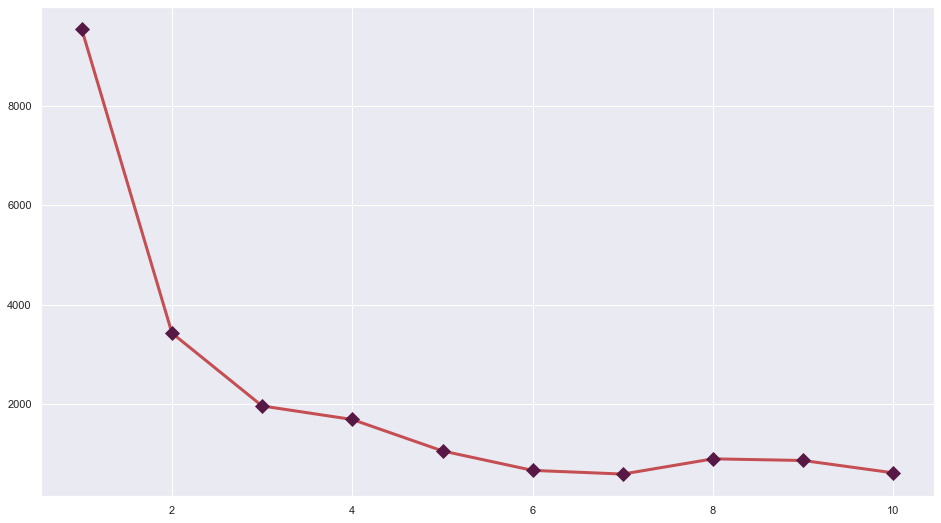

In [11]:
iris_clf.wcss_curve(data,n_k=10)

## MNIST Dataset

In [12]:
with np.load("mnist.npz") as data:
    x_train = data["training_images"]
    x_test = data["test_images"]
    v_x = data["validation_images"]

### Merging Training and Validation Datasets

In [13]:
x_train = np.append(x_train,v_x,axis=0)
x_train = np.append(x_train,x_test,axis=0)

### Flattening Images

In [14]:
x_train = np.reshape(x_train,(70000,28*28))

### MNIST Modeling

In [15]:
pca_m = PCA(2)
pca_mnist = pca_m.fit(x_train)

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


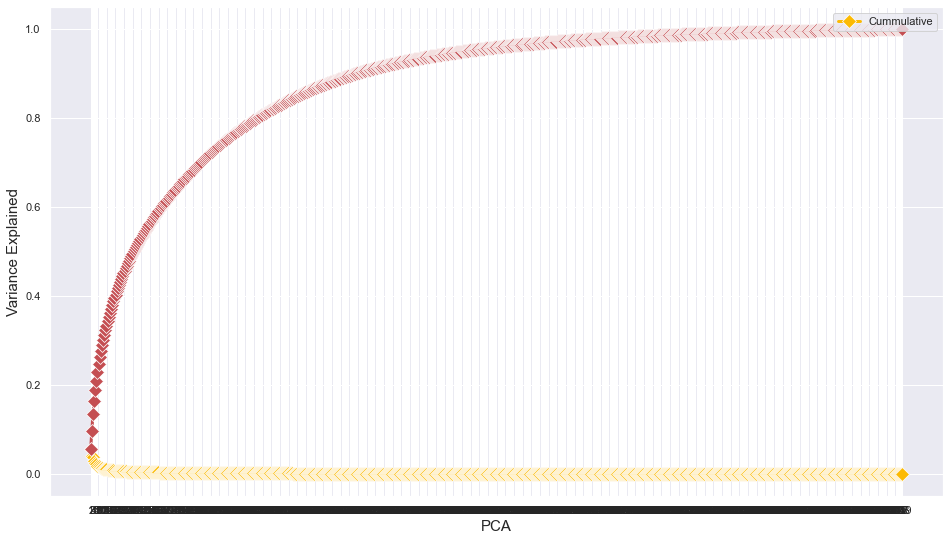

In [16]:
pca_m.scree_plot()

In [17]:
pca_mnist

array([[  0.8917154 ,   4.92969516],
       [ -8.81351494,   7.51748857],
       [ -2.20485116,  -9.82460466],
       ...,
       [  5.22257936,   1.18419277],
       [  2.17774074,   6.99491529],
       [-11.77786832,   5.40295915]])

In [18]:
mnist_clf = KMeansClassifier()

In [19]:
mnist_clf.fit(pca_mnist,k=10,iterer=5)

array([[ -0.731,  -2.413],
       [-12.615,  -3.057],
       [  4.664,  -4.797],
       [ -2.135,   1.895],
       [ -0.355,  -7.85 ],
       [  6.114,   2.898],
       [ -5.956, -12.411],
       [-12.618,   7.65 ],
       [ -0.785,   7.076],
       [  4.715,  -0.187]])

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


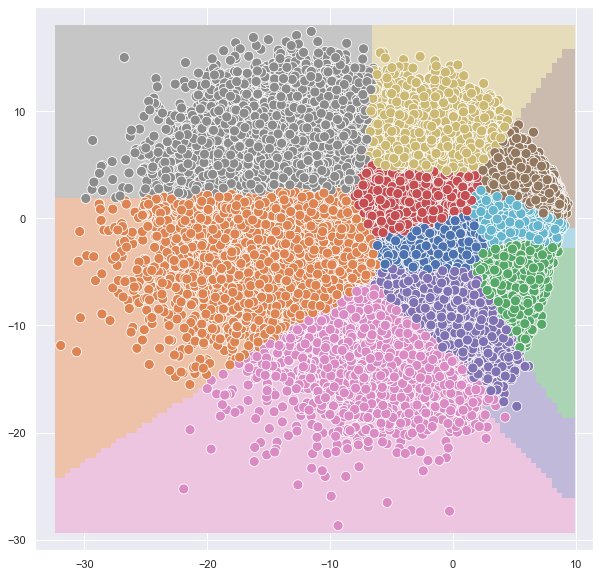

In [20]:
mnist_clf.decision_border(pca_mnist[:,0],pca_mnist[:,1],palette=sns.color_palette())

C:\Users\Saransh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


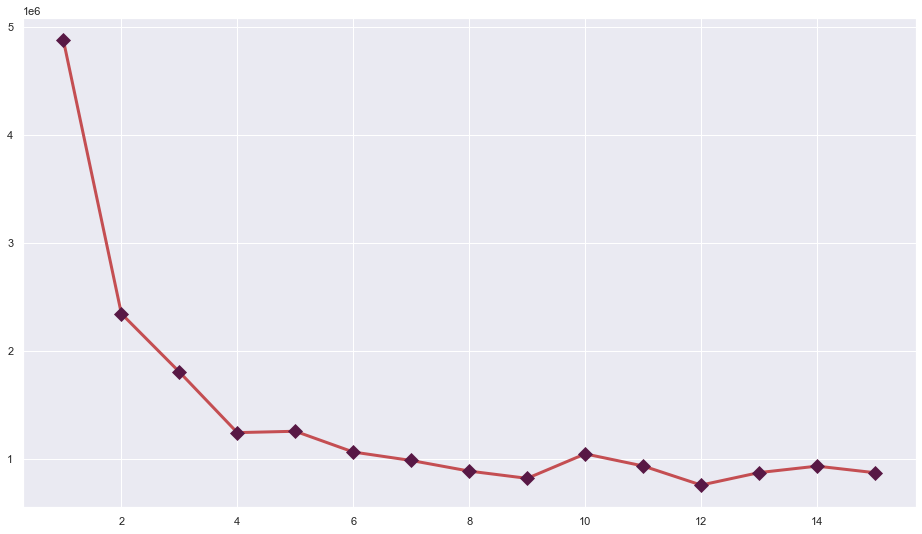

In [21]:
mnist_clf.wcss_curve(pca_mnist,n_k=15,iterer=2)